# Diamonds Dataset Analysis and Pre-Processing  

## Context
### This classic dataset contains the prices and other attributes of almost 54,000 diamonds. It's a great dataset for  data analysis and visualization. This notebook takes a quick analysis of the data.


## Content

* price price in US dollars (\$326--\$18,823)

* carat weight of the diamond (0.2--5.01)
 
* cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)
 
* color diamond colour, from J (worst) to D (best)
 
* clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
 
* x length in mm (0--10.74)
 
* y width in mm (0--58.9)
 
* z depth in mm (0--31.8)
 
* depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
 
* table width of top of diamond relative to widest point (43--95)

# Topics:
## 1. Exploring Data
## 2. Handling Data 
## 3. Visualization of Data


# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Extract Data

In [2]:

#data = pd.read_csv('/kaggle/input/diamonds/diamonds.csv')
data = pd.read_csv('datasets\d8\diamonds2.csv')

data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


# 1. Exploring Data

# 1.1 Data Size & Shape

In [3]:
data.size

593340

In [4]:
data.shape

(53940, 11)

# 1.2 Get general information about data columns, data types

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


# 1.3 Get Statistical Summary  

In [6]:
data.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


### Minimum value of (x,y,z) or (length,width,depth) is equal to zero, which is wrong (not possible) and we will handle in Handling Data section

# 1.4 Correlation Table

In [7]:
data.corr()

,Unnamed: 0,carat,depth,table,price,x,y,z
Unnamed: 0,1.000000,-0.377983,-0.034800,-0.100830,-0.306873,-0.405440,-0.395843,-0.399208
carat,-0.377983,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,-0.034800,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,-0.100830,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,-0.306873,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,-0.405440,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,-0.395843,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,-0.399208,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


## From Correlation table we get:
### 1. Carat and Price are highly corelated with x,y and z
### 2. But Depth doesn't have much impact, which is derived from x,y and z

# 1.5 Check for null values

In [8]:
data.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

## No null values

# 2 Handling Data

## 1. We need to handle the records where values of x,y,z is equal to zero.
## 2. We don't need Unnamed as a column

# 2.1 Drop Unnamed Column 

In [9]:
data.drop(['Unnamed: 0'],inplace = True, axis = 1)
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


# 2.2 Handle wrong value of x,y,z 

## 2.2.1 rows of x,y,z with wrong values

In [10]:
print('Number of rows with x = 0 are {}'.format((data.x==0).sum()))
print('Number of rows with x = 0 are {}'.format((data.y==0).sum()))
print('Number of rows with x = 0 are {}'.format((data.z==0).sum()))

Number of rows with x = 0 are 8
Number of rows with x = 0 are 7
Number of rows with x = 0 are 20


## 2.2.2 rows of x,y,z with wrong values set to NaN

In [11]:
data.x = data.x.replace(0,np.NaN)
data.y = data.y.replace(0,np.NaN)
data.z = data.z.replace(0,np.NaN)

print("Number of rows with x = 0 are {}".format((data.x==0).sum()))
print("Number of rows with y = 0 are {}".format((data.y==0).sum()))
print("Number of rows with z = 0 are {}".format((data.z==0).sum()))

Number of rows with x = 0 are 0
Number of rows with y = 0 are 0
Number of rows with z = 0 are 0


In [12]:
data.isna().sum()

carat       0
cut         0
color       0
clarity     0
depth       0
table       0
price       0
x           8
y           7
z          20
dtype: int64

## 2.2.3 rows with NaN values removed

In [13]:
data.dropna(inplace=True)
data.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

# 3. Visualization of Data 

# 3.1 Count of diamonds based on cut

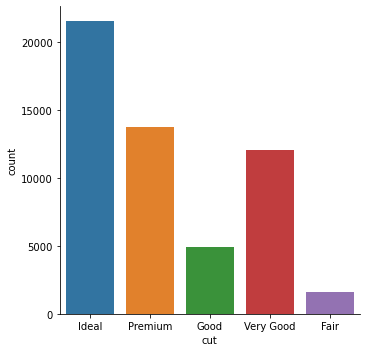

In [14]:
sns.catplot(data=data, x='cut', kind = "count")

# 3.2 Clarity vs Price
### clarity's info from content  : I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)

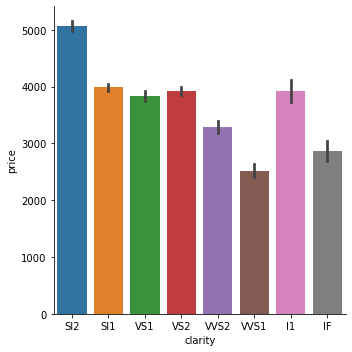

In [15]:
sns.catplot(data=data,x='clarity', y= 'price', kind = 'bar')

# 3.3 Color vs Price
## *Nice coloured diamonds aren't the most costly.*
### D (best) to J(worst) color

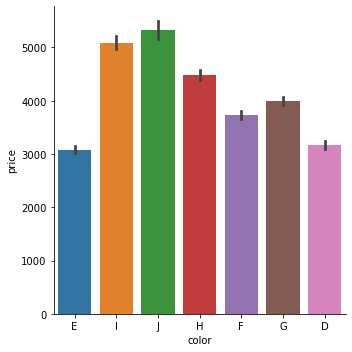

In [16]:
sns.catplot(data=data, x='color', y = 'price', kind = "bar")

# 3.4 Clarity vs Price
### *Note median close to 1st quartile *


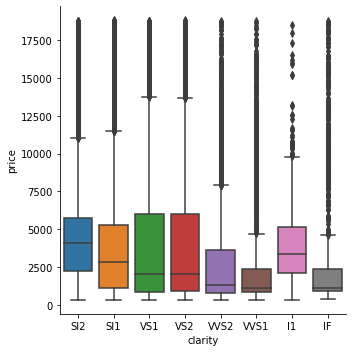

In [17]:
sns.catplot(data=data, x='clarity', y = 'price', kind = "box")

# 3.5 Cut vs Price
### *Different cut doesn't impact much on price*

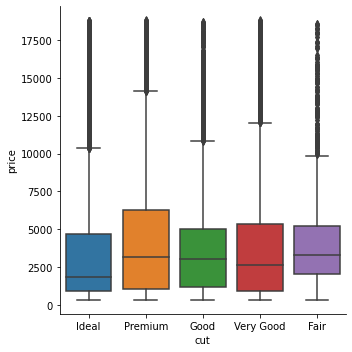

In [18]:
print(sns.catplot(data=data, x='cut', y = 'price', kind = "box"))

# Thank you
